# Trabajo Final. Análisis de Datos

## Alumnos:

### Domenje, Carlos R.

### Fux, Santiago.

---

## DATASET: Uso de Taxis Yellow Cab en USA en el año 2020

**Problema.** Responderemos a la siguiente pregunta

1. ¿Existe una manera de caracterizar los lugares más recurrentes para inicio / fin de viaje?


## 1. Obtención de datos

Para importar los datos, buscamos en la página web brindada por la cátedra:

- [Yellow Cab - Dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

**Nota**: El dataset utilizado será el del año 2020, los tres primeros meses (Enero, Febrero, Marzo) y será descargado en una carpeta llamada "data" dentro de la carpeta contenedora del proyecto.

In [1]:
# Path del dataset a utilizar.
DATASET_PATH = r'./data'

In [2]:
# listamos los archivos que se encuentran en el path
!ls {DATASET_PATH}

yellow_tripdata_2020-01.parquet yellow_tripdata_2020-03.parquet
yellow_tripdata_2020-02.parquet


In [3]:
# Importamos las librerias necesarias para interactuar con el dataset.

import pandas as pd
import glob
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import scipy.stats as stats
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score,plot_confusion_matrix,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler
from collections import Counter
# Set decimals format with 3 decimals
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
# El archivo del dataset tiene como formato .parquet, el cual es un archivo que esta orientado a columnas. 
all_files = glob.glob("./data/*.parquet")

df_list = []

for filename in all_files:
    # Se carga el archivo
    df = pd.read_parquet(filename)
    # Tomo el 10% del dataset total   
    df = df.sample(frac=0.1)
    # Agrego a la lista
    df_list.append(df)


df = pd.concat(df_list, axis=0, ignore_index=True)


df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1571207.000,1556055.000,1571207.000,1556055.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1556055.000
mean,1.673,1.501,2.883,1.057,164.480,162.240,1.252,12.613,1.106,0.492,2.192,0.331,0.298,18.558,2.297
std,0.470,1.142,22.347,0.775,65.790,69.994,0.485,11.658,1.256,0.073,2.672,1.583,0.034,14.242,0.705
min,1.000,0.000,-26.760,1.000,1.000,1.000,0.000,-280.000,-4.500,-0.500,-10.000,-19.250,-0.300,-280.300,-2.500
25%,1.000,1.000,0.970,1.000,125.000,113.000,1.000,6.500,0.000,0.500,0.000,0.000,0.300,11.160,2.500
50%,2.000,1.000,1.600,1.000,162.000,162.000,1.000,9.000,0.500,0.500,1.950,0.000,0.300,14.300,2.500
75%,2.000,2.000,2.930,1.000,234.000,234.000,2.000,14.000,2.500,0.500,2.860,0.000,0.300,19.890,2.500
max,6.000,9.000,27620.850,99.000,265.000,265.000,4.000,800.000,90.060,3.300,445.680,149.000,0.300,1040.390,2.750


In [5]:
## Para obtener una descripción del tipo de datos que contiene cada columna, utilizamos la funcion info()
# Podemos además, obtener una idea general de cuantos datos no nulos contiene.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571207 entries, 0 to 1571206
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1571207 non-null  int64         
 1   tpep_pickup_datetime   1571207 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  1571207 non-null  datetime64[ns]
 3   passenger_count        1556055 non-null  float64       
 4   trip_distance          1571207 non-null  float64       
 5   RatecodeID             1556055 non-null  float64       
 6   store_and_fwd_flag     1556055 non-null  object        
 7   PULocationID           1571207 non-null  int64         
 8   DOLocationID           1571207 non-null  int64         
 9   payment_type           1571207 non-null  int64         
 10  fare_amount            1571207 non-null  float64       
 11  extra                  1571207 non-null  float64       
 12  mta_tax                15712

In [6]:
# La función describe() nos da una vista general de valores de cantidades de datos, media, desv. standard, valores min y max de cada columna.
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1571207.000,1556055.000,1571207.000,1556055.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1556055.000
mean,1.673,1.501,2.883,1.057,164.480,162.240,1.252,12.613,1.106,0.492,2.192,0.331,0.298,18.558,2.297
std,0.470,1.142,22.347,0.775,65.790,69.994,0.485,11.658,1.256,0.073,2.672,1.583,0.034,14.242,0.705
min,1.000,0.000,-26.760,1.000,1.000,1.000,0.000,-280.000,-4.500,-0.500,-10.000,-19.250,-0.300,-280.300,-2.500
25%,1.000,1.000,0.970,1.000,125.000,113.000,1.000,6.500,0.000,0.500,0.000,0.000,0.300,11.160,2.500
50%,2.000,1.000,1.600,1.000,162.000,162.000,1.000,9.000,0.500,0.500,1.950,0.000,0.300,14.300,2.500
75%,2.000,2.000,2.930,1.000,234.000,234.000,2.000,14.000,2.500,0.500,2.860,0.000,0.300,19.890,2.500
max,6.000,9.000,27620.850,99.000,265.000,265.000,4.000,800.000,90.060,3.300,445.680,149.000,0.300,1040.390,2.750


### Descripción de Columnas del Dataset.


In [7]:
# Listado de tipos de variables presentes en el dataset
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                      object
dtype: object

In [8]:
# funcion para plotear las distribuciones de los atributos
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=10, ylabelsize=10,figsize=(18,18))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout
    plt.show()
    

# funcion para imprimir nulos
def print_null_info(col):
    print(f'Cantidad de nulos: {col.isnull().sum()}/{col.size}')

# funcion para imprimir datos de v. categoricas
def print_categorical(col):
    print(f'Ordinalidad: {col.unique()}')
    print_null_info(col)
    print('Ocurrencias:')
    print(col.value_counts().sort_values())

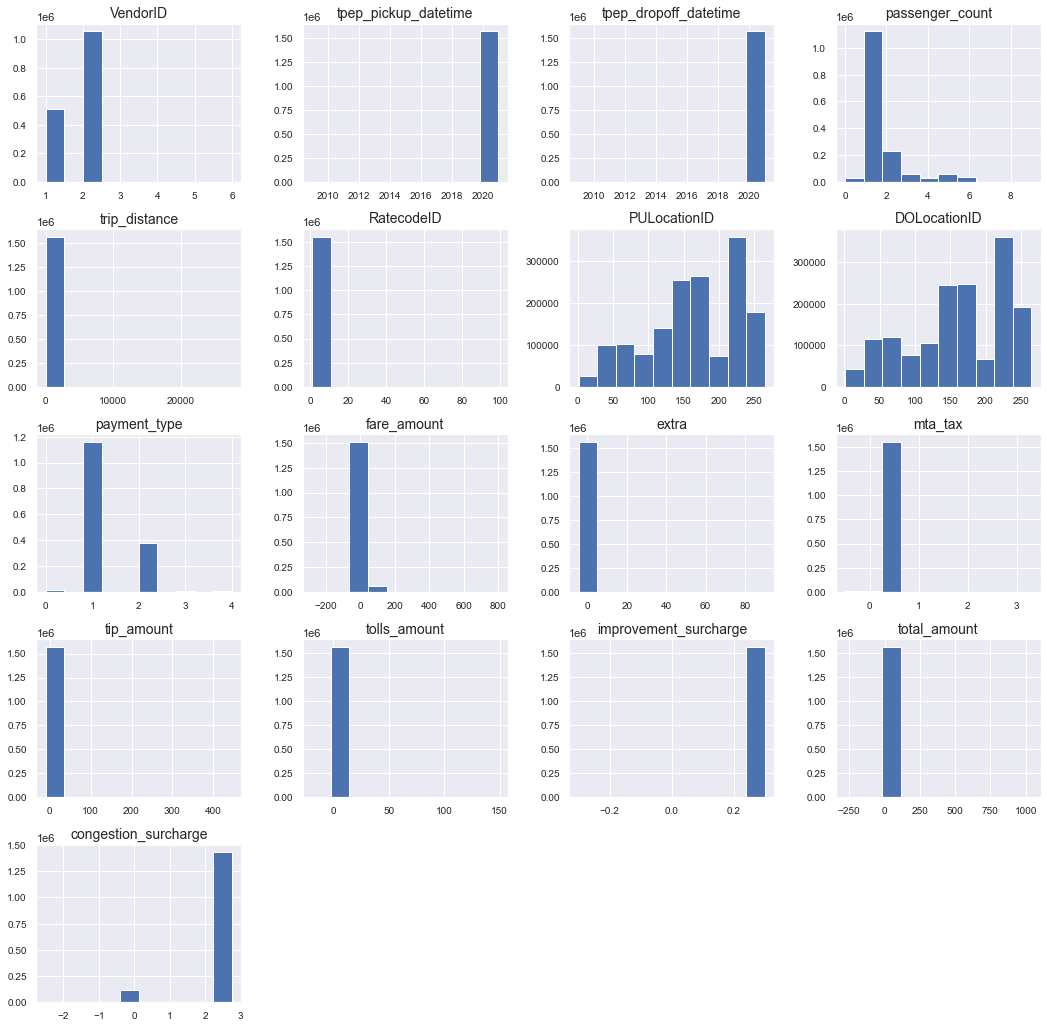

In [9]:
#imprimo distribuciones 
display_dataset_distributions(df)


- **VendorID**: Proveedor de servicios de tecnologias en taxis (T-PEP)
    - Tipo de dato: Categórica ordinal  
    - Tipo de variable: Entrada  


In [10]:
print_categorical(df.VendorID)

Ordinalidad: [2 1 6 5]
Cantidad de nulos: 0/1571207
Ocurrencias:
5          3
6         58
1     513942
2    1057204
Name: VendorID, dtype: int64



- **tpep_pickup_datetime**: Fecha y hora en el cual el reloj fue activado al iniciar un viaje.
    - Tipo de dato: Timestamp compuesto  
    - Tipo de variable: Entrada  

    - Ejemplo del dato en el dataset: 2020-07-01 00:25:32


In [11]:
print_null_info(df.tpep_pickup_datetime)

Cantidad de nulos: 0/1571207


- **tpep_dropoff_datetime**: Fecha y hora en el cual el reloj fue desactivador al finalizar un viaje.
    - Tipo de dato: Timestamp compuesto
    - Tipo de variable: Entrada  / Salida

    - Ejemplo del dato en el dataset: 2020-07-01 00:33:39


In [12]:
print_null_info(df.tpep_dropoff_datetime)

Cantidad de nulos: 0/1571207


- **passenger_count**: El número de pasajeros en el vehiculo. (Es un dato que lo ingresa el conductor.)
    - Tipo de dato: Numérico 
    - Tipo de variable: Entrada
    - Ejemplo del dato en el dataset: 1.0

In [13]:
print_null_info(df.passenger_count)

Cantidad de nulos: 15152/1571207



- **trip_distance**: La distancia del viaje transcurrido en millas reportada por el taxímetro. 
    - Tipo de dato: Numérico 
    - Tipo de variable: Entrada  

    - Ejemplo del dato en el dataset: 1.50


In [14]:
print_null_info(df.trip_distance)

Cantidad de nulos: 0/1571207


- **PULocationID**: TLC Zona en la que el taxímetro se activó.
    - Tipo de dato: Categórica ordinal
    - Tipo de variable: Entrada / Salida

    - Ejemplo del dato en el dataset: 238


In [15]:
print_categorical(df.PULocationID)

Ordinalidad: [236 161 162 205  87 158  43 107 152  75 237 209 170 141 151 142 246 164
 140 229 238 249 186 144  79  90 132  68 137 230 114 143 211 260  61  13
 116 233 234  50 163  48 261 148 239 248  33 243 113 262  97 100 125  24
 138 242 193 145 179 232   4 146 224  74 166 264 231 181 129  95 244 265
  45 263  65  94  88  89  51  41  25 169 168   7 247  52  72 218  42 119
 226  82  80 189  14   1  10 154  85  56 188 219 225 196 220  49 167 124
  83  40 135 149 222  66 216 256 215 139  37 200 255  76  93 112 191 223
 203 202 254  78  39 241  12 210 195  62 159  63  91 192   3 106  35 173
 121  19 228 102   8  71 194 213 130 207 127 212 185 235 122 250 131 136
  86 183  21  22  26 177  20 182 147  28 126 197 259 160  77  17 134 108
  70  92 180 117 217 133 128  98  69 198  81  60  64 155 257  16 123 227
   5 101 252  58 258 165 174 171  18  36  32 175 178 206  47  38 190  23
  55 157 115 208  34  31  73  29 153   9 118  54  11  67  46 172 214  15
 150  57 199 201  44 109 120 156  53 2


- **DOLocationID**: TLC Zona en la que el taxímetro se desactivó.
    - Tipo de dato: Categórica ordinal
    - Tipo de variable: Entrada / Salida 

    - Ejemplo del dato en el dataset: 75


In [16]:
print_categorical(df.DOLocationID)

Ordinalidad: [262 230 100  61  21 114  43 233 140 229 151 142 186  13  79 263 163 246
  50 234 238  90 137 236 164 231  75 148 161 138 116 113  48 130 144  28
 170  68 129  35 244 166 141 143  24 239 158   7 261 162 237  95 107 255
  17 132  41 249 243  87 242 226  89 232 145 250  74 208  51 125 112 182
   4 106 223  37 127 203 264  45 211 256 181 260 123  82 179 159 190  40
   1 216  10 188  67 209  97 200  42  88  33  56  66 124  22  25 168  52
 257 210 193  39 120 224 252 265 152 191 235  14 173  65 134  19 225 215
 136  62  49  70 139  11 220 198 218 133  12  83 258 119 189  71 227  80
 131  85  69 254  26  94 197 149   5 253  72  55  93 147 247 121  20  64
 146  54  31 228 201 167 135 217 202 248 171  36  32 155  76 219 213 195
 165 102  91 207  53 169 196 126  60  77 180 241  63   3  27  29 122 128
  34  16 183 157   9 108  96  38 160 251 212  57  47 174 222 185 192  15
 259 240 175 177  92  23 154 178  78  86 153 184 221 205  59 101  81 206
  73  98 194  18 117   8 118 245 115 1


- **RatecodeID**:  El código de tarifa final vigente al final del viaje.
    - Tipo de dato: Categórica ordinal
    - Tipo de variable: Entrada  

    - 1= Standard rate
    - 2= JFK 
    - 3= Newark
    - 4= Nassau or Westchester
    - 5= Negotiated fare
    - 6= Group ride


In [17]:
print_categorical(df.RatecodeID)

Ordinalidad: [ 1. nan  2.  5.  3.  4. 99.  6.]
Cantidad de nulos: 15152/1571207
Ocurrencias:
6.000           7
99.000         77
4.000        1261
3.000        3205
5.000        8738
2.000       35488
1.000     1507279
Name: RatecodeID, dtype: int64


- **store_and_fwd_flag**:  Este flag indica si el registro de viaje se llevó a cabo en la memoria del dispositivo del vehiculo antes de enviar al proveedor, también conocido como "almacenar y reenviar", porque el vehiculo no tenia conexion al servidor.
    - Tipo de dato: Categórica  
    - Tipo de variable: Entrada  

    - Y= Almacenar y reenviar informacion.
    - N= No almacenar y enviar informacion.


In [18]:
print_categorical(df.store_and_fwd_flag)

Ordinalidad: ['N' None 'Y']
Cantidad de nulos: 15152/1571207
Ocurrencias:
Y      16043
N    1540012
Name: store_and_fwd_flag, dtype: int64



- **payment_type**: Un código numérico que significa cómo el pasajero pagó por el viaje.
    - Tipo de dato: Categórica ordinal  
    - Tipo de variable: Entrada  

    - 1= Credit card
    - 2= Cash
    - 3= No charge
    - 4= Dispute
    - 5= Unknown
    - 6= Voided trip


In [19]:
print_categorical(df.payment_type)

Ordinalidad: [1 2 0 3 4]
Cantidad de nulos: 0/1571207
Ocurrencias:
4       4499
3       8255
0      15152
2     381654
1    1161647
Name: payment_type, dtype: int64


- **fare_amount**: La tarifa de tiempo y distancia calculada por el taxímetro.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 8.0


In [20]:
print_null_info(df.fare_amount)

Cantidad de nulos: 0/1571207


- **Extra**: Varios extras y recargos. Actualmente, esto solo incluye los cargos de $0.50 y $1 por la hora pico y por la noche.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.5


In [21]:
print_null_info(df.extra)

Cantidad de nulos: 0/1571207



- **mta_tax**: Impuesto MTA de $0.50 que se activa automáticamente según la tasa de uso del medidor.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.5


In [22]:
print_null_info(df.mta_tax)

Cantidad de nulos: 0/1571207


- **improvement_surcharge**: Recargo de mejora de $ 0.30 en viaje en el descenso de bandera. El recargo por mejora comenzó a cobrarse en 2015.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.3


In [23]:
print_null_info(df.improvement_surcharge)

Cantidad de nulos: 0/1571207


- **tip_amount**: Importe de la propina: este campo se completa automáticamente para las propinas de tarjetas de crédito. Las propinas en efectivo no están incluidas.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.00  


In [24]:
print_null_info(df.tip_amount)

Cantidad de nulos: 0/1571207


- **tolls_amount**: Importe total de todos los peajes pagados en el viaje.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  
    - Ejemplo del dato en el dataset: 0.00


In [25]:
print_null_info(df.tolls_amount)

Cantidad de nulos: 0/1571207



- **total_amount**: El monto total cobrado a los pasajeros. No incluye propinas en efectivo.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  
    - Ejemplo del dato en el dataset: 9.30


In [26]:
print_null_info(df.total_amount)

Cantidad de nulos: 0/1571207


- **congestion_surcharge**: Importe total recaudado en el viaje por el recargo por congestión del Estado de Nueva York.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  
    - Ejemplo del dato en el dataset: 0.00


In [27]:
print_null_info(df.congestion_surcharge)

Cantidad de nulos: 15152/1571207


- **airport_fee**: $1.25 para recoger solo en los aeropuertos LaGuardia y John F. Kennedy
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida
    - Ejemplo del dato en el dataset: None

In [28]:
print_null_info(df.airport_fee)

Cantidad de nulos: 1571207/1571207


## 2. Limpieza de los datos


### 2.1 Datos faltantes

In [29]:
# verificamos cantidad de items repetidos y los eliminamos
df = df.drop_duplicates()
df.describe() #TODO: Agrego describe para que se noten las cantidades eliminadas

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1571080.000,1556055.000,1571080.000,1556055.000,1571080.000,1571080.000,1571080.000,1571080.000,1571080.000,1571080.000,1571080.000,1571080.000,1571080.000,1571080.000,1556055.000
mean,1.673,1.501,2.883,1.057,164.483,162.241,1.252,12.611,1.106,0.492,2.193,0.331,0.298,18.556,2.297
std,0.470,1.142,22.348,0.775,65.788,69.993,0.485,11.656,1.256,0.073,2.672,1.582,0.034,14.241,0.705
min,1.000,0.000,-26.760,1.000,1.000,1.000,0.000,-280.000,-4.500,-0.500,-10.000,-19.250,-0.300,-280.300,-2.500
25%,1.000,1.000,0.970,1.000,125.000,113.000,1.000,6.500,0.000,0.500,0.000,0.000,0.300,11.160,2.500
50%,2.000,1.000,1.600,1.000,162.000,162.000,1.000,9.000,0.500,0.500,1.950,0.000,0.300,14.300,2.500
75%,2.000,2.000,2.930,1.000,234.000,234.000,2.000,14.000,2.500,0.500,2.860,0.000,0.300,19.890,2.500
max,6.000,9.000,27620.850,99.000,265.000,265.000,4.000,800.000,90.060,3.300,445.680,149.000,0.300,1040.390,2.750


In [30]:
# verificamos cantidad de nulos en cada categoría
for i in range(len(df.columns)):
  col_name = df.columns[i]
  col_data = df[col_name]
  print(f'{col_name}: {col_data.isnull().sum()}/{col_data.size}')

VendorID: 0/1571080
tpep_pickup_datetime: 0/1571080
tpep_dropoff_datetime: 0/1571080
passenger_count: 15025/1571080
trip_distance: 0/1571080
RatecodeID: 15025/1571080
store_and_fwd_flag: 15025/1571080
PULocationID: 0/1571080
DOLocationID: 0/1571080
payment_type: 0/1571080
fare_amount: 0/1571080
extra: 0/1571080
mta_tax: 0/1571080
tip_amount: 0/1571080
tolls_amount: 0/1571080
improvement_surcharge: 0/1571080
total_amount: 0/1571080
congestion_surcharge: 15025/1571080
airport_fee: 1571080/1571080


#### 2.1.1 Análisis de faltantes

Las categorías con faltantes son las siguientes:

* passenger_count: 15180/1571072
* RatecodeID: 15180/1571072
* store_and_fwd_flag: 15180/1571072
* congestion_surcharge: 15180/1571072
* airport_fee: 1571072/1571072

Para cada una de estas columnas se decide:
* __passenger_count__ es ingresado a mano por lo que los datos faltantes suponemos que corresponden a fallas en la carga por parte del conductor. Se decide eliminar los faltantes dado que representan el 1%
* __RatecodeID__ no aporta información por lo que se elimina esta feature
* __store_and_fwd_flag__ no aporta información por lo que se elimina esta feature
* __congestion_surcharge__ : los faltantes representan el 1% por lo que se quitan
* __airport_fee__ se quita ya que todos los valores son nulos


In [31]:
# descarto datos nulos de los features con interés (passenger count y congestion_surcharge)
df = df.dropna(subset=['passenger_count', 'congestion_surcharge'])
len(df['passenger_count'])

1556055

#### 2.1.2 Datos no nulos inválidos

En algunos features se detectan valores fuera del rango esperado (tal como valores negativos o fuera del rango de las categorías definidas)

In [32]:
# verificamos cantidad de negativos en las categorías numéricas
cols_to_check = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']

for i, col in enumerate(cols_to_check):
  col_data = df[col]
  print(f'{col}: {col_data[col_data < 0].count()}/{col_data.size}')
  

trip_distance: 1/1556055
fare_amount: 4965/1556055
extra: 2342/1556055
mta_tax: 4869/1556055
tip_amount: 45/1556055
tolls_amount: 103/1556055
improvement_surcharge: 4964/1556055
total_amount: 4964/1556055
congestion_surcharge: 3925/1556055


In [33]:
# Funcion para realizar subplots de variables

def plotVariables(dataframe, varArray):
    fig = plt.figure(figsize=(30,15))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for j,colName in enumerate(varArray):
        plt.subplot(3,3,j+1)
        plt.plot(dataframe[colName])
        plt.title(colName)
        

#### Exploración gráfica de variables con datos negativos

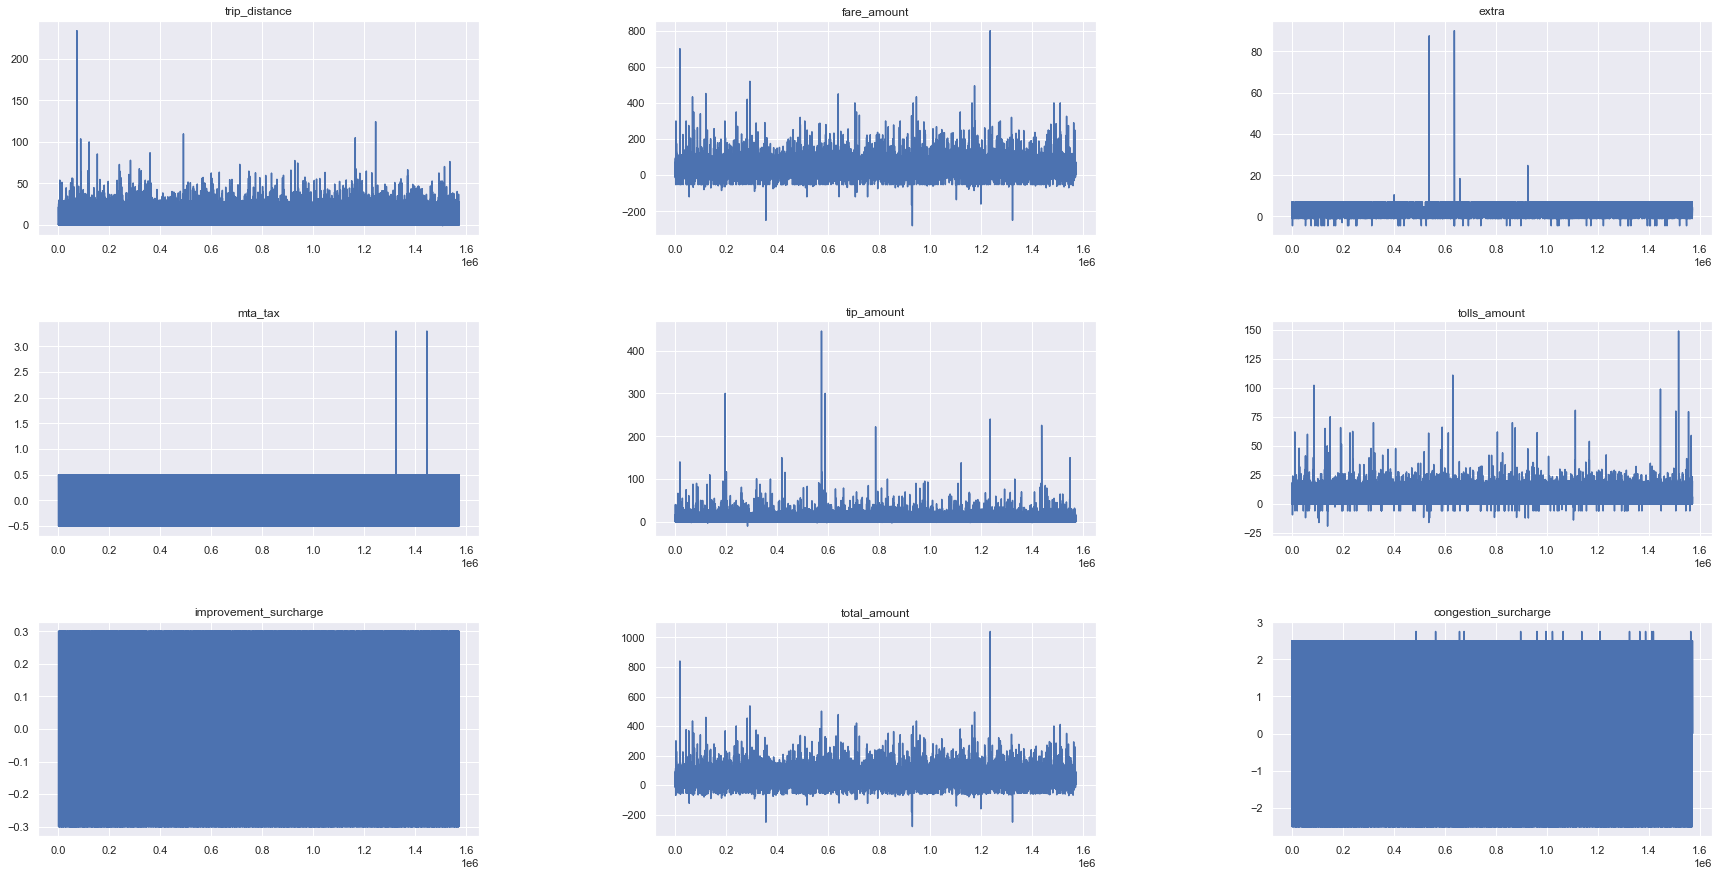

In [34]:
 #TODO: Agrego graficos para mostrar estos datos anomalos.
# Exploración gráfica de variables con datos negativos.

colArrays = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 
            'tip_amount', 'tolls_amount', 'improvement_surcharge', 
            'total_amount', 'congestion_surcharge']

plotVariables(df,colArrays)


In [35]:
# trip distance: borro <= 0
df = df[(df['trip_distance'] > 0)]
# fare_amount: borro < 0
df = df[(df['fare_amount'] >= 0)]
# extra: borro < 0
df = df[(df['extra'] >= 0)]
# mta_tax: borro < 0
df = df[(df['mta_tax'] >= 0)]
# tip_amount: borro < 0
df = df[(df['tip_amount'] >= 0)]
#tolls amount: borro < 0
df = df[(df['tolls_amount'] >= 0)]
#improvement_surcharge: borro < 0
df = df[(df['improvement_surcharge'] >= 0)]
#total_amount: borro < 0
df = df[(df['total_amount'] >= 0)]
#congestion_surcharge: borro < 0
df = df[(df['congestion_surcharge'] >= 0)]

len(df)



1535710

#### Exploración gráfica de datos filtrados


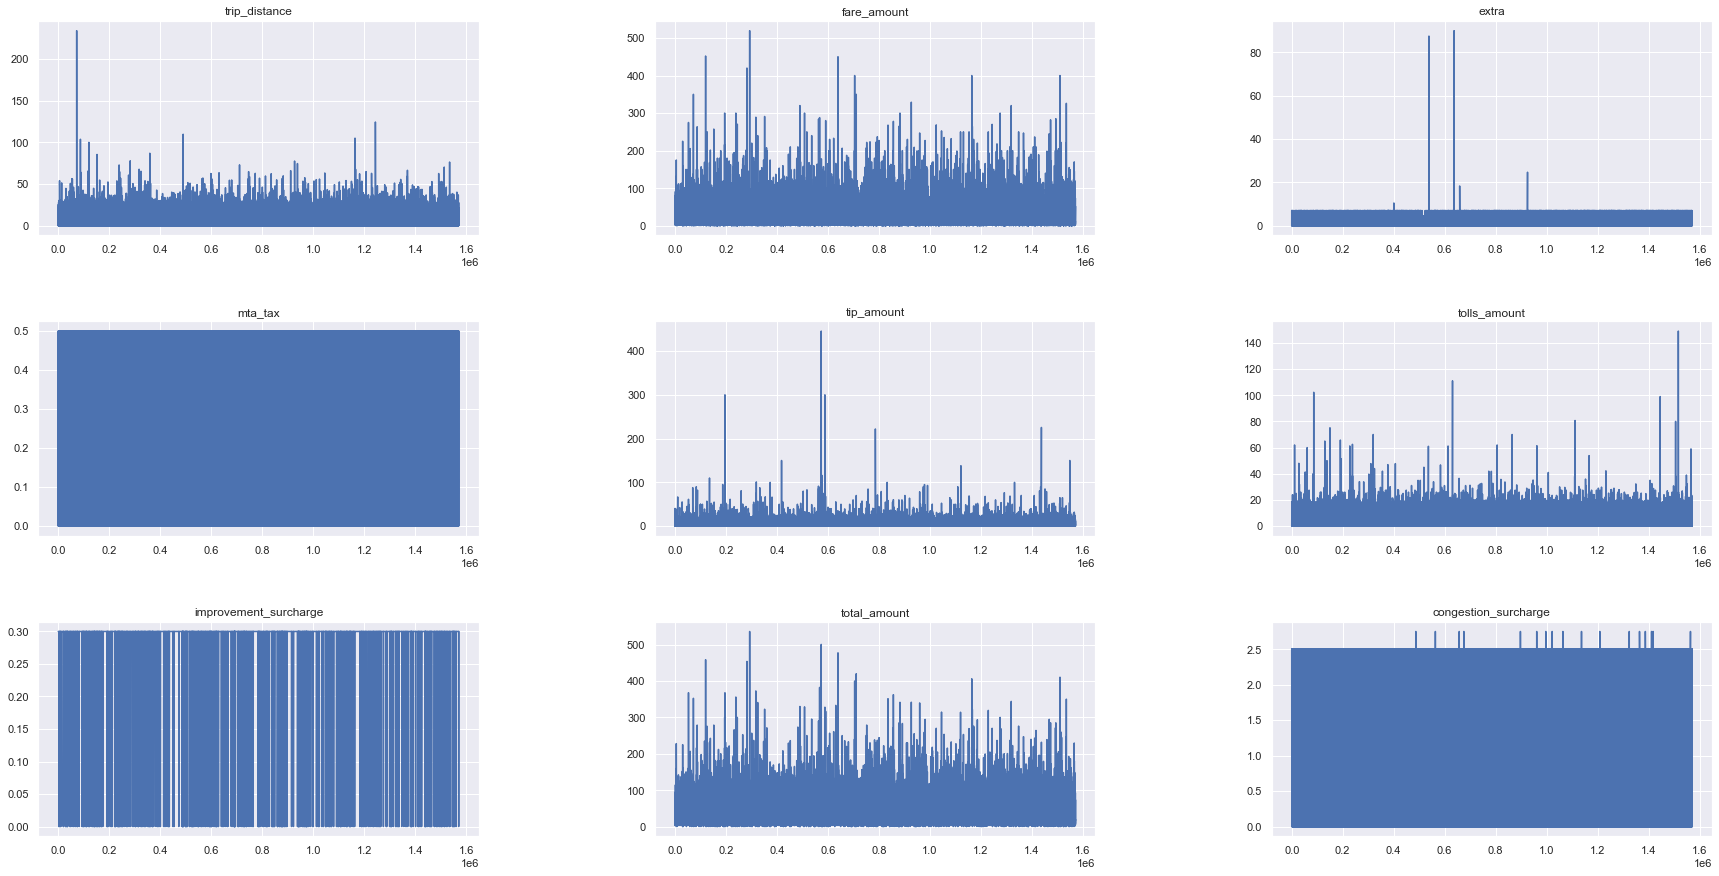

In [36]:
# Datos sin valores negativos
plotVariables(df,colArrays)

#### 2.1.3 Filtro entradas por tipo de pago
Descarto otros pagos diferenes de CREDIT (payment_type = 1)

In [37]:
df = df[df["payment_type"] == 1]
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1151880.000,1151880.000,1151880.000,1151880.000,1151880.000,1151880.000,1151880.000,1151880.000,1151880.000,1151880.000,1151880.000,1151880.000,1151880.000,1151880.000,1151880.000
mean,1.671,1.493,2.867,1.040,166.144,163.941,1.000,12.462,1.131,0.498,2.948,0.340,0.300,19.279,2.379
std,0.470,1.139,3.672,0.284,65.247,69.329,0.000,10.908,1.253,0.031,2.624,1.598,0.003,13.980,0.536
min,1.000,0.000,0.010,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,1.000,1.000,1.000,132.000,113.000,1.000,6.500,0.000,0.500,1.750,0.000,0.300,11.800,2.500
50%,2.000,1.000,1.650,1.000,162.000,162.000,1.000,9.000,0.500,0.500,2.320,0.000,0.300,14.800,2.500
75%,2.000,2.000,2.910,1.000,234.000,234.000,1.000,13.500,2.500,0.500,3.260,0.000,0.300,20.380,2.500
max,2.000,9.000,233.690,6.000,265.000,265.000,1.000,452.000,18.350,0.500,445.680,149.000,0.300,500.980,2.750


### 2.2 Ingeniería de datos

#### 2.2.1 Features de tiempo y hora del día

In [38]:
# generamos una nueva columna "duration" con el tiempo de viaje
ts_init = pd.to_datetime(df['tpep_pickup_datetime']).values.astype(np.int64) / 1000000000
ts_end = pd.to_datetime(df['tpep_dropoff_datetime']).values.astype(np.int64) / 1000000000
duration = ts_end - ts_init
df['duration'] = duration

# ademas creamos 3 categorías para el horario en que se inició el viaje: diurno, vespertino y nocturno
MORNING_START = 6
MORNING_END = 13
AFTERNOON_START = 14
AFTERNOON_END = 20
EVENING_START = 21
EVENING_END = 5 

day_interval = df['tpep_pickup_datetime'].dt.hour
df['morning'] = pd.cut(day_interval, bins=[-float('Inf'), MORNING_START - 1, MORNING_END, float('Inf')], labels=[0, 1, 0], ordered=False)
df['afternoon'] = pd.cut(day_interval, bins=[-float('Inf'), AFTERNOON_START - 1, AFTERNOON_END, float('Inf')], labels=[0, 1, 0], ordered=False)
df['evening'] = pd.cut(day_interval, bins=[-float('Inf'), 0, EVENING_END, EVENING_START, 23, float('Inf')], labels=[0, 1, 0, 1, 0], ordered=False)

# reviso que sean validas 
df['morning'].values.isnull().sum(), df['afternoon'].values.isnull().sum(), df['evening'].values.isnull().sum()

(0, 0, 0)

In [39]:
def outlier_diagnostic_plots(df, variable):
    fig,axes = plt.subplots(1,3,figsize=(20,4))

    sns.histplot(df[variable], bins=30,ax=axes[0], kde=True)
    axes[0].set_title('Histograma')
    
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    axes[1].set_title('QQ')
    
    # boxplot    
    sns.boxplot(y=df[variable],ax=axes[2])
    axes[2].set_title('Box&Whiskers')

In [40]:
# termino de borrar todos los negativos
df['morning'].values.isnull().sum(), df['afternoon'].values.isnull().sum(), df['evening'].values.isnull().sum()

# verifico si tengo entradas con duration < 0
duration_invalid = df[df['duration'] < 0]['duration'].count()
print(f'Duraciones inválidas: {duration_invalid}')

Duraciones inválidas: 1


In [41]:
# Se eliminan las duraciones invalidas
df = df[(df['duration'] >= 0)]

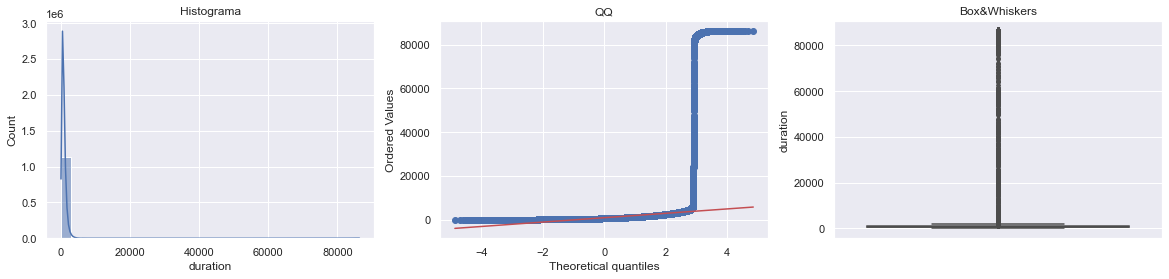

In [42]:
# Graficamos las nuevas columnas para observar su distribucion.
outlier_diagnostic_plots(df, 'duration')

#### Exploración gráfica de Morning, Afternoon, Evening

Text(0.5, 1.0, 'Evening')

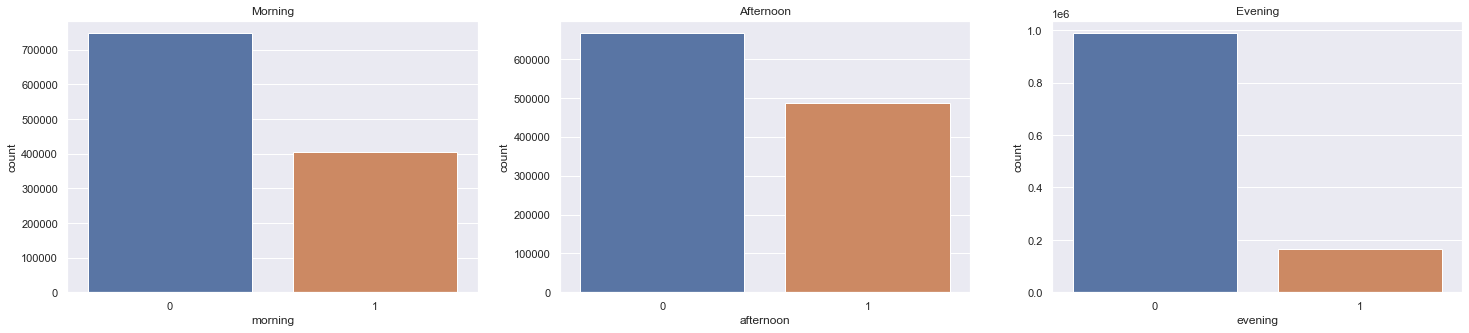

In [43]:
fig,axes = plt.subplots(1,3,figsize=(25,5))


sns.countplot(x='morning', data=df,ax=axes[0])
axes[0].set_title('Morning')

sns.countplot(x='afternoon', data=df,ax=axes[1])
axes[1].set_title('Afternoon')

sns.countplot(x='evening', data=df,ax=axes[2])
axes[2].set_title('Evening')


#### 2.2.2 Codificación del origen y destino

[(237, 52381), (161, 51686), (236, 50998), (162, 44682), (186, 39406), (230, 38746), (234, 37897), (170, 37096), (142, 35262), (48, 33237)]
[(0, 730488), (237, 52381), (161, 51686), (236, 50998), (162, 44682), (186, 39406), (230, 38746), (234, 37897), (170, 37096), (142, 35262), (48, 33237)]


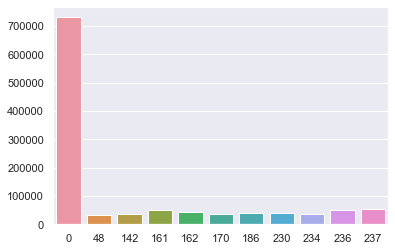

In [44]:
# definimos el umbral mínimo de cantidad de viajes para podar las categorías PULocationID y DOLocationID.
# location_id_min_th_count = 0.01
# total_items = len(df['PULocationID'])

# # convertimos PULocationID usando frequency encoding y me quedo con los que representan al menos 1%
# pulocation_id_freq_map = (df['PULocationID'].value_counts(sort=True) / total_items).to_dict()
# df['PULocationIDFreq'] = df['PULocationID'].apply(lambda x: pulocation_id_freq_map[x])
# # # convertimos DOLocationID
# # dolocation_id_freq_map = (df['DOLocationID'].value_counts(sort=True) / total_items).to_dict()
# # df['DOLocationIDFreq'] = df['DOLocationID'].apply(lambda x: dolocation_id_freq_map[x])

# #pongo en 0 todas las categorías con menor frecuencia que <location_id_min_th_count>
# def clear_location_low_values(x, th):
#   if x <= th:
#     return 0
#   return x

# df['PULocationIDFreq'] = df['PULocationIDFreq'].apply(lambda x: clear_location_low_values(x, location_id_min_th_count))
# # df['DOLocationIDFreq'] = df['DOLocationIDFreq'].apply(lambda x: clear_location_low_values(x, location_id_min_th_count))
# Contamos las apariciones de los lugares mas concurridos
from turtle import color


mostPickUpSites = Counter(df['PULocationID'])

# Mostramos los 10 primeros.
print(mostPickUpSites.most_common(10))

aux = mostPickUpSites.most_common(10)
most_pickup_important_places = []
for i in aux:
    most_pickup_important_places.append(i[0])

    
# for i, placeValue in enumerate(df['DOLocationID']):
#     if (not placeValue in most_important_places):
#         df.loc[i,'DOLocationID'] = 0

df['PULocationID'] = np.where(df['PULocationID'].isin(most_pickup_important_places), df['PULocationID'], 0)

type_feature = df['PULocationID'].value_counts()

sns.barplot(x=type_feature.index, y=type_feature.values, data=df['PULocationID'])
commonPickUpSites = Counter(df['PULocationID'])
# Mostramos los 10 primeros.
print(commonPickUpSites.most_common(20))


#### 2.2.3 Balance de la variable de salida

In [ ]:
#verifico el rango de los ids
df['DOLocationID'].min(), df['DOLocationID'].max()


In [ ]:
#asigno a la categoria 0 a todos los que aparecen por debajo del 1%
# location_id_min_th_count = 0.01 * len(df)
# df['DOLocationIDTruncated'] = df['DOLocationID'].apply(lambda x: clear_location_low_values(x, location_id_min_th_count))
# df['DOLocationIDTruncated'].values[:10], location_id_min_th_count


[(236, 53970), (237, 47783), (161, 44228), (170, 37476), (162, 35519), (234, 33151), (142, 32904), (239, 32559), (141, 31679), (230, 30585)]
[(0, 772025), (236, 53970), (237, 47783), (161, 44228), (170, 37476), (162, 35519), (234, 33151), (142, 32904), (239, 32559), (141, 31679), (230, 30585)]


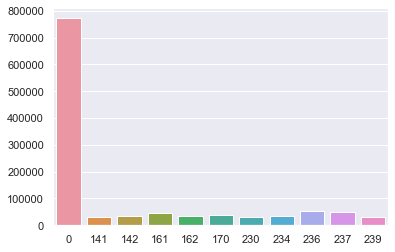

In [45]:


# Contamos las apariciones de los lugares mas concurridos
mostCommonSites = Counter(df['DOLocationID'])

# Mostramos los 10 primeros.
print(mostCommonSites.most_common(10))

aux = mostCommonSites.most_common(10)
most_important_places = []
for i in aux:
    most_important_places.append(i[0])

    
# for i, placeValue in enumerate(df['DOLocationID']):
#     if (not placeValue in most_important_places):
#         df.loc[i,'DOLocationID'] = 0

df['DOLocationID'] = np.where(df['DOLocationID'].isin(most_important_places), df['DOLocationID'], 0)

type_feature = df['DOLocationID'].value_counts()

sns.barplot(x=type_feature.index, y=type_feature.values, data=df['DOLocationID'])
commonSites = Counter(df['DOLocationID'])
# Mostramos los 10 primeros.
print(commonSites.most_common(20))

In [ ]:
df.describe()

### 2.3 Selección final de las features

En base al procesamiento anterior, seleccionamos los siguientes features del dataset:

In [ ]:

feature_cols = [
  'passenger_count', 'trip_distance', 'fare_amount', 'extra', 
  'mta_tax', 'tip_amount', 'tolls_amount', 
  'improvement_surcharge', 'total_amount', 
  'congestion_surcharge', 'duration', 'PULocationIDFreq',
  'morning', 'afternoon', 'evening']
target_col = ['DOLocationID']

X = df[feature_cols]
y = df[target_col]

#### Eliminacion de datos con baja varianza

In [ ]:
# TODO
from sklearn.feature_selection import VarianceThreshold

constant_filter = VarianceThreshold(threshold=0.01)

#Fit and transforming on train data
data_constant = constant_filter.fit_transform(X)
print(X.shape)
print(data_constant.shape)

In [ ]:
X.describe()

In [ ]:
data_constant.dtype

In [ ]:
y.shape

## 3.Entrenamiento de modelos 
### 3.1 Separación de datos


In [ ]:
# Particionamos en train y test
train_ratio = 0.7
test_ratio = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)


In [ ]:
#imprimo tamaños de los dataset de train y test
print(f'train len={len(X_train)}')
print(f'test len={len(X_test)}')

### 3.2 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
total_trees = 100 # number of trees
max_depth = 2

rf = RandomForestClassifier(n_estimators = total_trees, max_depth = max_depth, random_state=0)

In [ ]:
rf.fit(X_train, y_train.values.reshape(-1))


In [ ]:

# Utilizamos el método de predicción en los datos de prueba
y_rf_pred = rf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_rf_pred))
print('Area bajo la curva ROC:',np.round(roc_auc_score(y_test,y_rf_pred),4))
# rf_precision, rf_recall, rf_threshold=precision_recall_curve(y_test, y_rf_pred)
# print('Area bajo la curva Precision-Recall:',np.round(auc(rf_recall,rf_precision),4))
# plot_confusion_matrix(rf, X_test, y_test,cmap='Blues')

### 3.3 Regresión logística

In [ ]:
def logistic_regression_report(X_train,X_test,y_train,y_test):
    
    scaler=StandardScaler()  
    
    X_train_sc=scaler.fit_transform(X_train) # Estandarizamos los datos     
    X_test_sc=scaler.transform(X_test)
        
    model=LogisticRegressionCV(scoring='f1')
    
    model.fit(X_train_sc,y_train)
    y_pred=model.predict(X_test_sc)
    y_proba=model.predict_proba(X_test_sc)
    
    print(classification_report(y_test,y_pred))    
    print('Area bajo la curva ROC:',np.round(roc_auc_score(y_test,y_proba[:,1]),4))    
    precision, recall,threshold=precision_recall_curve(y_test,y_proba[:,1])
    print('Area bajo la curva Precision-Recall:',np.round(auc(recall,precision),4))
    print(f'Precision:{precision}, Recall: {recall}:')
    plot_confusion_matrix(model,X_test_sc,y_test,cmap='Blues')

In [ ]:
#logistic_regression_report(X_train, X_test, y_train, y_test)
scaler = StandardScaler()  
X_train_sc = scaler.fit_transform(X_train) # Estandarizamos los datos     
X_test_sc = scaler.transform(X_test)

lr = LogisticRegression(random_state = 1)
lr.fit(X_train_sc,y_train)
y_lr_pred = lr.predict(X_test_sc)
lr_precision, lr_recall, lr_threshold=precision_recall_curve(y_test,y_lr_pred)

lr_precision, lr_recall, lr_threshold

In [ ]:
lr_precision

# TODO - Falta terminar

1. Aplicar filtrado Kendall para analizar las variables de entrada con respecto a la de salida
2. Analizar variables con poca varianza
3. Quedarse con las 10 Locations mas importantes de Pick Up y Drop Off y todas las otras meterlas en un id 0 (others)
4. Correr Random Forest y Linear regression. Obtener los feature importance.
5. Ejecutar pyCaret para ver en que concluye el automl